> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# VI: Perceptron

<div style="text-align: right"> **Due date: Dec. 7, 2018.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 9 PM.** </div> 


### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2018-12-03 21:59:12.424618


## Problem description

In this problem, we will implemnt an online perceptron algorithm using a MNIST dataset. The MNIST dataset contains handwritten digits that is commonly used for testing various machine learning algorithms. We use a subset of the dataset only. The training data ($\texttt{perceptron_training_data.csv}$) contains two handwritten digits, either 3 or 5, labeled as 1 or -1, respectively. We can visualize each sample using the $\texttt{imshow}$ function after reshaping $794$-dimensional vector to a $28 \times 28$ matrix.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('perceptron_training_data.csv')
df = df.values
x = np.delete(df, 0, 1) 
y = np.array(df[0][0])
for i in range(1,1000):
    y = np.row_stack((y, df[i][0])) 

df_t = pd.read_csv('perceptron_test_data.csv')
df_t = df_t.values
x_t = np.delete(df_t, 0, 1) 
y_t = np.array(df_t[0][0])
for i in range(1,1000):
    y_t = np.row_stack((y_t, df_t[i][0])) 
print(x.shape, x_t.shape)

(1000, 784) (1000, 784)


(*80 points*) P1.1 Implement an online perceptron algorithm.

(*10 points*) P1.2 Plot the number of missclassifications over epochs on the training set ($\texttt{perceptron_training_data.csv}$). 
  > Initialize weights and the bias to 0.    
  > Number of epoch: 100    
  > An epoch is one complete presentation of the data set to be learned to a learning machine. For example, the total number of iterations is 500 for 5 epochs when the training dataset consists of 100 samples.
  
(*10 points*) P1.3 Plot the accuracy over epochs on the test set ($\texttt{perceptron_test_data.csv}$).
  > Initialize weights and the bias to 0.       
> Number of epoch: 100

In [3]:
def perceptron (x, y):
    w = np.zeros((1,784))
    epoch = 100
    miss = 0
    miss_count =[]
    x_axis = []
    w_total = []
    for t in range (x.shape[0] * epoch):
        pre_in = np.dot(x[t%1000], w.T)
        if (pre_in < 0):
            y_hat = -1
        else:
            y_hat = 1
        
        if (y_hat != y[t%1000][0]):
            w = w + y[t%1000][0] * x[t%1000] 
            miss += 1
        if (t % 1000 == 999):
            x_axis.append((t+1)/1000)
            miss_count.append(miss)
            miss = 0
            w_total.append(w)
    print(miss_count)
    plt.plot(x_axis, miss_count)
    plt.show()
    return w_total

[125, 99, 68, 63, 58, 58, 55, 41, 43, 40, 40, 35, 26, 32, 27, 28, 15, 15, 25, 28, 13, 11, 16, 15, 14, 14, 17, 11, 11, 6, 5, 5, 10, 5, 14, 8, 11, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


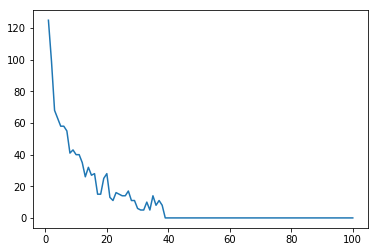

In [4]:
w_total = perceptron (x, y)

# Description

강의자료 9페이지에 있는 perceptron algorithm을 그대로 구현했다. 초기 weight들이 모두 0이기 때문에 초기 iteration에서는 miss가 많이 나왔다. 하지만 iteration(epoch단위)이 증가할수록 miss가 0에 수렴했다. 중간에 linear classification을 위해 signoid 함수를 if-else문으로 구현했다. epoch단위로 돌리기 때문에 modulus(%)를 사용했다.

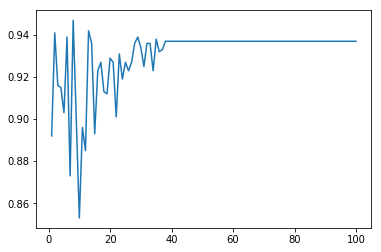

In [7]:
accuracy = []
x_axis = []
for i in range (len(w_total)):
    correct = 0
    w = w_total[i]
    for t in range(x_t.shape[0]):
        if (np.dot(x_t[t], w.T) < 0):
            y_hat = -1
        else:
            y_hat = 1

        if (y_hat == y_t[t][0]):
            correct += 1
    x_axis.append(i+1)
    accuracy.append(correct/x_t.shape[0])
plt.plot(x_axis, accuracy)
plt.show()

# Description

1번에서 epoch마다 구해준 w값을 이용해 test-set의 정확도를 구해보았다. training 시 miss가 많았을 때는 정확도에 noise가 있었지만 miss가 0으로 수렴하고나서는 93%의 정확도를 보여주었다.